# Homework 4 Solutions
Equation I want to solve is

$\tan(z) = \sqrt{(\frac{z_0}{z})^2 - 1}$

Where

\begin{align}
z &= a\frac{\sqrt{2m(E+V_0)}}{\hbar} \\
z_0 &= a\frac{\sqrt{2m(V_0)}}{\hbar}
\end{align}

What I'm after are the energies $E$ that solve this equation. Our constants for this problem are,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
def lhs_hw4(E):
    V_0 = 450 #J
    a = 50e-12 #Width of the well is +/- a (m)
    hbar = 4.1356e-15/(2*np.pi) #Value of hbar (eV*s)
    #Kg and eV don't play well together so I want my mass in eV/c^2
    c = 3e8 #Speed of light (m/s)
    m_e = (0.511e6)/c**2 #Mass of the electron in eV/c^2
    z_0 = a*np.sqrt(2*m_e*V_0)/hbar
    z = a*np.sqrt(2*m_e*(E + V_0))/hbar
    return np.tan(z) 
def rhs_hw4(E):
    V_0 = 450 #J
    a = 50e-12 #Width of the well is +/- a (m)
    hbar = 4.1356e-15/(2*np.pi) #Value of hbar (eV*s)
    c = 3e8 #Speed of light (m/s)
    m_e = (0.511e6)/c**2 #Mass of the electron in eV/c^2
    z_0 = a*np.sqrt(2*m_e*V_0)/hbar
    z = a*np.sqrt(2*m_e*(E + V_0))/hbar
    return np.sqrt((z_0/z)**2 - 1) 

#### a) Plot both sides

(-10, 10)

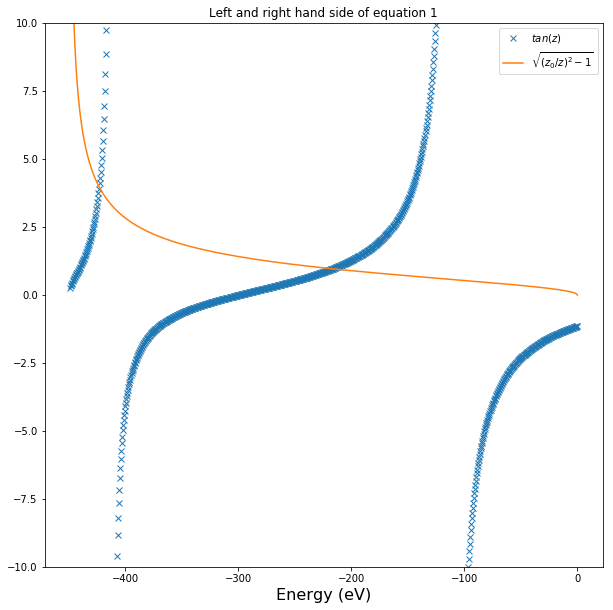

In [3]:
plt.figure(figsize = (10,10))
NRG_range = np.linspace(-449, 0, 1000)
plt.plot(NRG_range, lhs_hw4(NRG_range),'x', label = '$tan(z)$')
plt.plot(NRG_range, rhs_hw4(NRG_range), label = '$\sqrt{(z_0/z)^2 - 1}$')
plt.legend()
plt.title('Left and right hand side of equation 1')
plt.xlabel('Energy (eV)', size = 16)
plt.ylim(-10,10)

### b) Plot 1 function

In [4]:
def hw4_function(E):
    return lhs_hw4(E) - rhs_hw4(E)

(-10, 10)

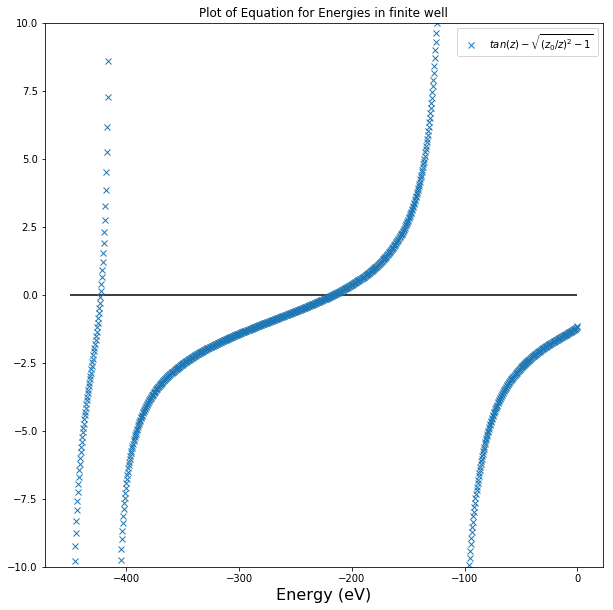

In [5]:
V_0 = 450
plt.figure(figsize = (10,10))
NRG_range = np.linspace(-449, 0, 1000)
plt.plot(NRG_range, hw4_function(NRG_range),'x', label = '$tan(z) - \sqrt{(z_0/z)^2 - 1}$')
plt.hlines(0,-450,0)
plt.legend()
plt.title('Plot of Equation for Energies in finite well')
plt.xlabel('Energy (eV)', size = 16)
plt.ylim(-10,10)

Now I need the derivative of the functions
\begin{equation}
\frac{d}{dE} \tan(z) = \sec^2(z)* \frac{dz}{dE} 
\end{equation}
\begin{equation}
\frac{d}{dE} \sqrt{(\frac{z_0}{z})^2 - 1} = \frac{z_0^2}{z^3\sqrt{(\frac{z_0}{z})^2 - 1}}*\frac{dz}{dE} 
\end{equation}

In [6]:
import numpy as np
def dzdE(E):
    V_0 = 450 #J
    a = 50e-12 #Width of the well is +/- a (m)
    hbar = 4.1356e-15/(2*np.pi) #Value of hbar (eV*s)
    #Kg and eV don't play well together so I want my mass in eV/c^2
    c = 3e8 #Speed of light (m/s)
    m_e = (0.511e6)/c**2 #Mass of the electron in eV/c^2
    z_0 = a*np.sqrt(2*m_e*V_0)/hbar
    return (a*np.sqrt(2*m_e))/(2*hbar)*(E + V_0)**(-0.5)
def deriv_lhs_hw4(E):
    V_0 = 450 #J
    a = 50e-12 #Width of the well is +/- a (m)
    hbar = 4.1356e-15/(2*np.pi) #Value of hbar (eV*s)
    #Kg and eV don't play well together so I want my mass in eV/c^2
    c = 3e8 #Speed of light (m/s)
    m_e = (0.511e6)/c**2 #Mass of the electron in eV/c^2
    z_0 = a*np.sqrt(2*m_e*V_0)/hbar
    z = a*np.sqrt(2*m_e*(E + V_0))/hbar
    return (1/np.cos(z))**2 *dzdE(E)
def deriv_rhs_hw4(E):
    V_0 = 450 #J
    a = 50e-12 #Width of the well is +/- a (m)
    hbar = 4.1356e-15/(2*np.pi) #Value of hbar (eV*s)
    c = 3e8 #Speed of light (m/s)
    m_e = (0.511e6)/c**2 #Mass of the electron in eV/c^2
    z_0 = a*np.sqrt(2*m_e*V_0)/hbar
    z = a*np.sqrt(2*m_e*(E + V_0))/hbar
    foo = z**3 * np.sqrt((z_0/z)**2 - 1) 
    return -z_0**2 / foo * dzdE(E)
def deriv_hw4_function(E):
    return deriv_lhs_hw4(E) - deriv_rhs_hw4(E)

In [7]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 2'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
 bisect_eq2.py            deriv_eq2.py  'figure 2.1.png'  'figure 2.4.png'
 bisect.py                equation2.py  'Figure 2.2.png'   newton.py
'Chapter 2 Stuff.ipynb'   equation3.py  'figure 2.3.png'   __pycache__/


/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


(-1, 10)

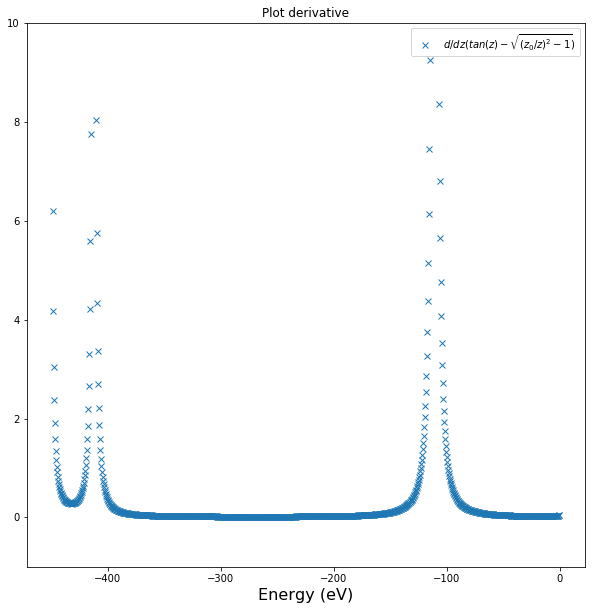

In [17]:
#This part you didn't have to do but I wanted to see what it looked like
plt.figure(figsize = (10,10))
NRG_range = np.linspace(-449, 0, 1000)
plt.plot(NRG_range, deriv_hw4_function(NRG_range),'x', label = '$d/dz (tan(z) - \sqrt{(z_0/z)^2 - 1})$')
plt.legend(loc = 1)
plt.title('Plot derivative')
plt.xlabel('Energy (eV)', size = 16)
plt.ylim(-1,10)

In [9]:
%run newton.py
E1 = newton(hw4_function, deriv_hw4_function, -440)
E2 = newton(hw4_function, deriv_hw4_function, -200)
E1,E2 #Answers in eV

(-423.2318744729022, -216.8342022217933)

In [10]:
#or in joules it is,
E1*1.60218e-19, E2*1.60218e-19

(-6.780936446429944e-17, -3.474074221157128e-17)